In [4]:
using Plots
gr(size=(600,400))

Plots.GRBackend()

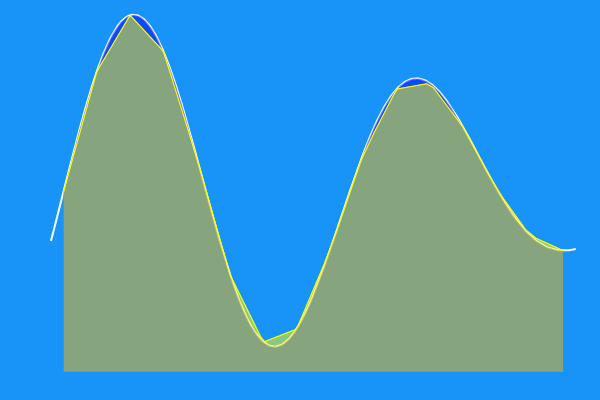

In [127]:
f(x) = sin(10x) * 0.3 + 0.5 + sin(4π * x) * 0.2

n = 16
x = range(0, 1, length=n)
xx = range(0, 1, length=2n-1)[2:2:end-1]

s(x, a, b) = begin
    h = (b - a) / 2
    # f((a + b) / 2) # ponto medio
    f(a) + (f(b) - f(a)) * (x - a) / (b - a) # trapezio
    # ??? simpson
end
s(t) = begin
    i = max(min(findfirst(x .≥ t), n), 2)
    s(t, x[i-1], x[i])
end

plot(f, -0.025, 1.025, c=:white, lw=2, leg=false, axis=false, grid=false)
plot!(f, 0, 1, c=RGBA(0, 0, 1, 0.5), fill=0, lw=0)
plot!(s, 0, 1, c=RGBA(1, 1, 0, 0.5), fill=0)
plot!(s, 0, 1, c=RGBA(1, 1, 0))
# scatter!(xx, f.(xx), c=:magenta, ms=3)
h = (xx[2] - xx[1]) / 2
# for i = 1:n-1
#     y = f(xx[i])
#     plot!([x[i], x[i]], [0, y], c=RGBA(1, 1, 0))
# end
plot!(background_color="#1893f8")
xlims!(-0.05, 1.05)
ylims!(0, 1)

In [12]:
f(x) = exp(x)
F(x) = exp(x)
a, b = 0.0, 1.0

(0.0, 1.0)

In [13]:
IntegralExata = F(b) - F(a)

1.718281828459045

In [14]:
IPM = (b - a) * f((a + b) / 2)

1.6487212707001282

In [16]:
IT = (b - a) * (f(a) + f(b)) / 2

1.8591409142295225

In [18]:
IS = (b - a) * (f(a) + 4 * f((a+b)/2) + f(b)) / 6

1.7188611518765928

In [19]:
function pontomedio(f, a, b)
    return (b - a) * f((a + b) / 2)
end

function trapezio(f, a, b)
    return (b - a) * (f(a) + f(b)) / 2
end

function simpson(f, a, b)
    return (b - a) * (f(a) + 4 * f((a + b) / 2) + f(b)) / 6
end

simpson (generic function with 1 method)

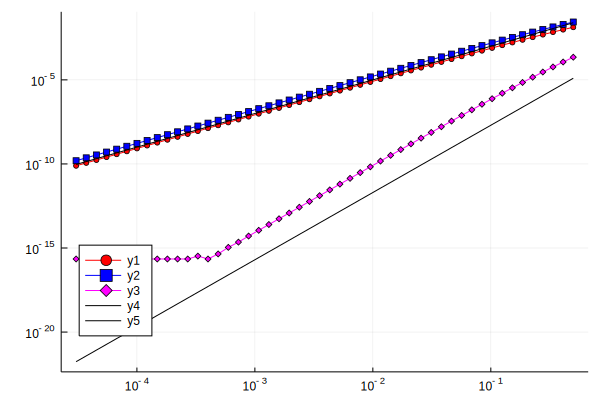

In [56]:
f(x) = 1 / x
F(x) = log(x)
a = 1.0

hs = 2.0 .^ -range(1, 15, length=50)
EPM = []
ET = []
ES = []
for h in hs
    b = a + h
    I = F(b) - F(a)
    IPM = pontomedio(f, a, b)
    IT  = trapezio(f, a, b)
    IS  = simpson(f, a, b)
    push!(EPM, abs(IPM - I) / abs(I))
    push!(ET,  abs(IT - I) / abs(I))
    push!(ES,  abs(IS - I) / abs(I))
end

EPM .= max.(EPM, eps())
ET .= max.(ET, eps())
ES .= max.(ES, eps())
plot(hs, EPM, c=:red, m=(3), xaxis=:log, yaxis=:log, legend=:bottomleft)
plot!(hs, ET, c=:blue, m=(3,:square))
plot!(hs, ES, c=:magenta, m=(3,:diamond))
# plot!(hs, hs.^1, c=:black)
plot!(hs, hs.^2 / 10, c=:black)
plot!(hs, hs.^4 / 5000, c=:black)

In [92]:
function trapezio(f, a, b, n; T=Float64)
    h = (b - a) / n
    S = zero(T)
    for i = 1:n-1
        x = a + i * h
        S += f(x)
    end
    S = f(a) + 2S + f(b)
    return h * S / 2
end

function pontomedio(f, a, b, n; T=Float64)
    if n % 2 != 0
        error("n deve ser par")
    end
    h = (b - a) / (n + 2)
    S = zero(T)
    for i = 0:2:n
        x = a + (i + 1) * h
        S += f(x)
    end
    return 2h * S
end

function simpson(f, a, b, n; T=Float64)
    if n % 2 != 0
        error("n deve ser par")
    end
    h = (b - a) / n
    S = zero(T)
    for i = 1:2:n-1
        x = a + i * h
        S += 4 * f(x)
    end
    for i = 2:2:n-2
        x = a + i * h
        S += 2* f(x)
    end
    S += f(a) + f(b)
    return S * h / 3
end

simpson (generic function with 2 methods)

In [118]:
f(x) = exp(x)
F(x) = exp(x)
a, b = big"0", big"1"
Iexato = F(b) - F(a)

IT = trapezio(f, a, b, 100)
IT, abs(IT - Iexato) / abs(Iexato)

(1.718296147450417425496664606237360223920676328926478559836757627226824602203521, 8.333319444477513144841478608311302275212576020445886071423655797592831378641581e-06)

In [110]:
IPMR = pontomedio(f, a, b, 100000)
IPMR, abs(IPMR - Iexato) / abs(Iexato)

(1.7182818284303967, 1.6672711366402774e-11)

In [119]:
ISR = simpson(f, a, b, 10000, T=BigFloat)
ISR, abs(ISR - Iexato) / abs(Iexato)

(1.718281828459045236314888486026813404534887410243498547876567834633175564225975, 5.555555548941798948743386236288146017575867932317688442817811824200548069885098e-19)

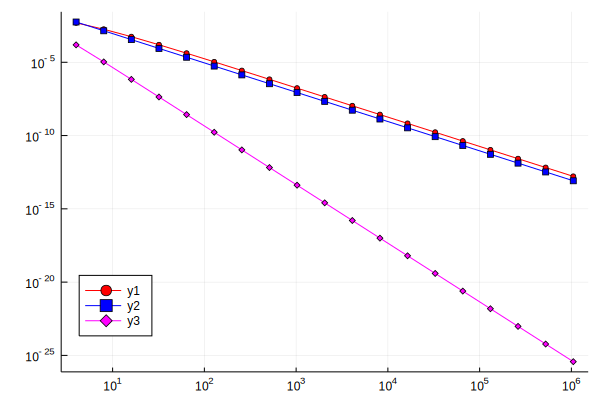

In [122]:
f(x) = 1 / x
F(x) = log(x)
a = big"1"
b = big"2"
I = F(b) - F(a)

ns = BigInt(2) .^ (2:20)
EPM = []
ET = []
ES = []
for n in ns
    IPM = pontomedio(f, a, b, n, T=BigFloat)
    IT  = trapezio(f, a, b, n, T=BigFloat)
    IS  = simpson(f, a, b, n, T=BigFloat)
    push!(EPM, abs(IPM - I) / abs(I))
    push!(ET,  abs(IT - I) / abs(I))
    push!(ES,  abs(IS - I) / abs(I))
end

EPM .= max.(EPM, eps(BigFloat))
ET .= max.(ET, eps(BigFloat))
ES .= max.(ES, eps(BigFloat))
plot(ns, EPM, c=:red, m=(3), xaxis=:log, yaxis=:log, legend=:bottomleft)
plot!(ns, ET, c=:blue, m=(3,:square))
plot!(ns, ES, c=:magenta, m=(3,:diamond))